In [1]:
import scipy.ndimage
import numpy as np

In [3]:
mat = scipy.ndimage.imread('elevation.png')

In [4]:
sea = mat[0,0]

In [5]:
sea

array([ 90, 190, 191, 255], dtype=uint8)

In [6]:
colors = mat.reshape(mat.shape[0] * mat.shape[1], mat.shape[2])
unique_colors = np.vstack({tuple(row) for row in colors})

In [7]:
len(unique_colors)

2165

In [11]:
# Taken from the scale in the image
scale = np.column_stack((np.array([120, 120, 184, 206, 207, 247, 248, 248, 248, 248, 120, 138]),
                       np.array([205, 119, 119, 122, 119, 119, 151, 183, 214, 247, 247, 229]),
                       np.array([203, 243, 203, 203, 180, 116, 116, 116, 116, 117, 117, 116]),
                       255*np.ones(12)))

In [12]:
scale

array([[ 120.,  205.,  203.,  255.],
       [ 120.,  119.,  243.,  255.],
       [ 184.,  119.,  203.,  255.],
       [ 206.,  122.,  203.,  255.],
       [ 207.,  119.,  180.,  255.],
       [ 247.,  119.,  116.,  255.],
       [ 248.,  151.,  116.,  255.],
       [ 248.,  183.,  116.,  255.],
       [ 248.,  214.,  116.,  255.],
       [ 248.,  247.,  117.,  255.],
       [ 120.,  247.,  117.,  255.],
       [ 138.,  229.,  116.,  255.]])

In [13]:
converted = np.array([np.array([np.linalg.norm(row) for row in scale - color]).argmin() for color in colors])

In [14]:
lookup = np.array([0,19, 41, 59, 76, 94, 117, 149, 192, 250, 343, 997])

In [15]:
map_converted = lookup[converted.reshape(mat.shape[:2])]

In [16]:
rows = np.sum(map_converted, 1) != 0
cols = np.sum(map_converted, 0) != 0

In [17]:
map_remove_sea = (map_converted[rows, :])[:,cols]

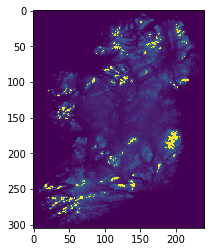

In [25]:
import matplotlib.pyplot as plt
plt.imshow(map_remove_sea)
plt.show()

In [26]:
map_remove_sea.shape[0]/map_remove_sea.shape[1]

1.2708333333333333

In [27]:
map_remove_sea.shape

(305, 240)

In [34]:
scaled = scipy.ndimage.interpolation.zoom(map_remove_sea, [418.0/305, 334.0/240], order=0)

In [39]:
scaled.shape

(418, 334)

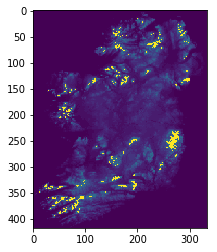

In [36]:
import matplotlib.pyplot as plt
plt.imshow(scaled)
plt.show()

In [40]:
scaled_pixels = scaled/789

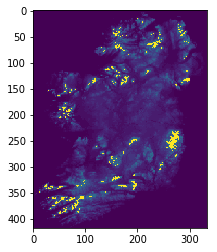

In [41]:
import matplotlib.pyplot as plt
plt.imshow(scaled)
plt.show()

In [42]:
np.savetxt('topo.mat', scaled_pixels)

1.2636248415716096